In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

print(X_train.shape)

(60000, 1, 28, 28)


In [4]:

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [16]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), input_shape=(1, 13, 13), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

result = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 27s - loss: 0.2930 - acc: 0.9090 - val_loss: 0.0642 - val_acc: 0.9790
Epoch 2/10
 - 25s - loss: 0.0772 - acc: 0.9761 - val_loss: 0.0587 - val_acc: 0.9813
Epoch 3/10
 - 25s - loss: 0.0560 - acc: 0.9827 - val_loss: 0.0369 - val_acc: 0.9878
Epoch 4/10
 - 25s - loss: 0.0451 - acc: 0.9856 - val_loss: 0.0301 - val_acc: 0.9898
Epoch 5/10
 - 25s - loss: 0.0387 - acc: 0.9882 - val_loss: 0.0314 - val_acc: 0.9894
Epoch 6/10
 - 26s - loss: 0.0336 - acc: 0.9895 - val_loss: 0.0335 - val_acc: 0.9889
Epoch 7/10
 - 26s - loss: 0.0302 - acc: 0.9907 - val_loss: 0.0268 - val_acc: 0.9914
Epoch 8/10
 - 26s - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0313 - val_acc: 0.9896
Epoch 9/10
 - 26s - loss: 0.0256 - acc: 0.9920 - val_loss: 0.0260 - val_acc: 0.9922
Epoch 10/10
 - 30s - loss: 0.0234 - acc: 0.9925 - val_loss: 0.0215 - val_acc: 0.9929


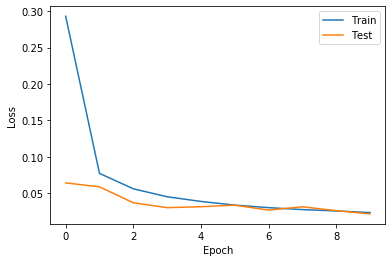

In [17]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

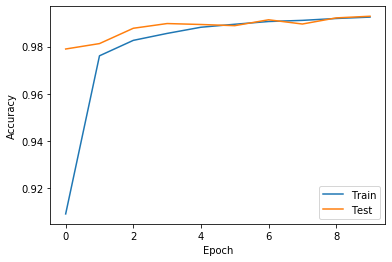

In [19]:
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()